Sentiment Analysis

In [1]:

Token = 'TOKEN2.csv'
OHCO = ['author', 'title', 'chap_num', 'para_num', 'sent_num'] # We exclude genre
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

mansfield = ('austen','Mansfield Park')
abbey = ('austen','Northanger Abbey')
pride_and_prejudice = ('austen', 'Pride and Prejudice')


salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

import os
os.chdir('C:\\Users\\dwagn\\git\\DS5001\\Project')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

sns.set()
%matplotlib inline

## Get lexicon columns

In [3]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [4]:
salex['polarity'] = salex.positive - salex.negative

In [5]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

# Get novels

In [6]:
TOKENS = pd.read_csv('TOKEN2.csv')

In [7]:
LIB = pd.read_csv('LIB.csv').set_index('book_id')

In [8]:
TOKENS = TOKENS.join(LIB, on='book_id').drop(columns = 'book_file').set_index(OHCO).sort_index()

In [9]:
TOKENS.head(10)

book_id  token_num  \
author title          chap_num para_num sent_num                       
austen Mansfield Park 49       1        0             141          0   
                                        0             141          1   
                                        0             141          2   
                                        0             141          3   
                                        0             141          4   
                                        0             141          5   
                                        0             141          6   
                                        0             141          7   
                                        0             141          8   
                                        0             141          9   

                                                               pos_tuple  pos  \
author title          chap_num para_num sent_num                                
austen Mansfield Park 49       1        0                ('About', 'IN')   IN   
                                        0               ('thirty', 'CD')   CD   
                                        0               ('years', 'NNS')  NNS   
                                        0                  ('ago', 'RB')   RB   
                                        0                ('Miss', 'NNP')  NNP   
                                        0               ('Maria', 'NNP')  NNP   
                                        0               ('Ward,', 'NNP')  NNP   
                                        0                   ('of', 'IN')   IN   
                                        0         ('Huntingdon,', 'NNP')  NNP   
                                        0                 ('with', 'IN')   IN   

                                                    token_str    term_str  \
author title          chap_num para_num sent_num                            
austen Mansfield Park 49       1        0               About       about   
                                        0              thirty      thirty   
                                        0               years       years   
                                        0                 ago         ago   
                                        0                Miss        miss   
                                        0               Maria       maria   
                                        0               Ward,        ward   
                                        0                  of          of   
                                        0         Huntingdon,  huntingdon   
                                        0                with        with   

                                                  term_id  \
author title          chap_num para_num sent_num            
austen Mansfield Park 49       1        0              44   
                                        0           10554   
                                        0           11832   
                                        0             312   
                                        0            6704   
                                        0            6474   
                                        0           11459   
                                        0            7176   
                                        0            5205   
                                        0           11713   

                                                                      book_title  \
author title          chap_num para_num sent_num                                   
austen Mansfield Park 49       1        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         

In [10]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [11]:
TOKENS[salex.columns].sample(10)

anger  anticipation  \
author title               chap_num para_num sent_num                        
austen Pride and Prejudice 52       1        1           0.0           0.0   
                           11       14       0           0.0           0.0   
       Mansfield Park      49       2        0           0.0           0.0   
       Pride and Prejudice 46       4        0           0.0           0.0   
       Northanger Abbey    32       16       3           0.0           0.0   
       Mansfield Park      77       16       11          0.0           0.0   
                           73       21       1           0.0           0.0   
                           58       16       3           0.0           0.0   
                           60       27       0           0.0           0.0   
                           82       1        5           0.0           0.0   

                                                       disgust  fear  joy  \
author title               chap_num para_num sent_num                       
austen Pride and Prejudice 52       1        1             0.0   0.0  0.0   
                           11       14       0             0.0   0.0  0.0   
       Mansfield Park      49       2        0             0.0   0.0  0.0   
       Pride and Prejudice 46       4        0             0.0   0.0  0.0   
       Northanger Abbey    32       16       3             0.0   0.0  0.0   
       Mansfield Park      77       16       11            0.0   0.0  0.0   
                           73       21       1             0.0   0.0  0.0   
                           58       16       3             0.0   0.0  0.0   
                           60       27       0             0.0   0.0  0.0   
                           82       1        5             0.0   0.0  0.0   

                                                       negative  positive  \
author title               chap_num para_num sent_num                       
austen Pride and Prejudice 52       1        1              NaN       NaN   
                           11       14       0              NaN       NaN   
       Mansfield Park      49       2        0              NaN       NaN   
       Pride and Prejudice 46       4        0              NaN       NaN   
       Northanger Abbey    32       16       3              NaN       NaN   
       Mansfield Park      77       16       11             NaN       NaN   
                           73       21       1              NaN       NaN   
                           58       16       3              NaN       NaN   
                           60       27       0              NaN       NaN   
                           82       1        5              NaN       NaN   

                                                       sadness  surprise  \
author title               chap_num para_num sent_num                      
austen Pride and Prejudice 52       1        1             0.0       0.0   
                           11       14       0             0.0       0.0   
       Mansfield Park      49       2        0             0.0       0.0   
       Pride and Prejudice 46       4        0             0.0       0.0   
       Northanger Abbey    32       16       3             0.0       0.0   
       Mansfield Park      77       16       11            0.0       0.0   
                           73       21       1             0.0       0.0   
                           58       16       3             0.0       0.0   
                           60       27       0             0.0       0.0   
                           82       1        5             0.0       0.0   

                                                       trust  polarity  
author title               chap_num para_num sent_num                   
austen Pride and Prejudice 52       1        1           0.0       0.0  
                           11       14       0           0.0       0.0  
       Mansfield Park      49       2        0           0.0   

In [12]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  \
author title               chap_num para_num sent_num                   
austen Pride and Prejudice 53       43       2              he    0.0   
                           56       76       3              so    0.0   
       Mansfield Park      87       9        0          report    0.0   
       Pride and Prejudice 40       12       9               i    0.0   
                           30       10       0             and    0.0   
                                    3        1         passing    0.0   
       Northanger Abbey    45       17       2              in    0.0   
       Mansfield Park      63       59       4             see    0.0   
       Northanger Abbey    49       30       4              be    0.0   
       Pride and Prejudice 59       44       2             nor    0.0   

                                                       anticipation  disgust  \
author title               chap_num para_num sent_num                          
austen Pride and Prejudice 53       43       2                  0.0      0.0   
                           56       76       3                  0.0      0.0   
       Mansfield Park      87       9        0                  0.0      0.0   
       Pride and Prejudice 40       12       9                  0.0      0.0   
                           30       10       0                  0.0      0.0   
                                    3        1                  0.0      0.0   
       Northanger Abbey    45       17       2                  0.0      0.0   
       Mansfield Park      63       59       4                  0.0      0.0   
       Northanger Abbey    49       30       4                  0.0      0.0   
       Pride and Prejudice 59       44       2                  0.0      0.0   

                                                       fear  joy  sadness  \
author title               chap_num para_num sent_num                       
austen Pride and Prejudice 53       43       2          0.0  0.0      0.0   
                           56       76       3          0.0  0.0      0.0   
       Mansfield Park      87       9        0          0.0  0.0      0.0   
       Pride and Prejudice 40       12       9          0.0  0.0      0.0   
                           30       10       0          0.0  0.0      0.0   
                                    3        1          0.0  0.0      0.0   
       Northanger Abbey    45       17       2          0.0  0.0      0.0   
       Mansfield Park      63       59       4          0.0  0.0      0.0   
       Northanger Abbey    49       30       4          0.0  0.0      0.0   
       Pride and Prejudice 59       44       2          0.0  0.0      0.0   

                                                       surprise  trust  \
author title               chap_num para_num sent_num                    
austen Pride and Prejudice 53       43       2              0.0    0.0   
                           56       76       3              0.0    0.0   
       Mansfield Park      87       9        0              0.0    0.0   
       Pride and Prejudice 40       12       9              0.0    0.0   
                           30       10       0              0.0    0.0   
                                    3        1              0.0    0.0   
       Northanger Abbey    45       17       2              0.0    0.0   
       Mansfield Park      63       59       4              0.0    0.0   
       Northanger Abbey    49       30       4              0.0    0.0   
       Pride and Prejudice 59       44       2              0.0    0.0   

                                                       polarity  
author title               chap_num para_num sent_num            
austen Pride and Prejudice 53       43       2              0.0  
                           56       76       3              0.0  
       Mansfield Park      87       9        0              0.0  
       Pride and Prejudice 40       12       9              0.0  
      

In [13]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [14]:
TOKENS.head()

book_id  token_num  \
author title          chap_num para_num sent_num                       
austen Mansfield Park 49       1        0             141          0   
                                        0             141          1   
                                        0             141          2   
                                        0             141          3   
                                        0             141          4   

                                                         pos_tuple  pos  \
author title          chap_num para_num sent_num                          
austen Mansfield Park 49       1        0          ('About', 'IN')   IN   
                                        0         ('thirty', 'CD')   CD   
                                        0         ('years', 'NNS')  NNS   
                                        0            ('ago', 'RB')   RB   
                                        0          ('Miss', 'NNP')  NNP   

                                                 token_str term_str  term_id  \
author title          chap_num para_num sent_num                               
austen Mansfield Park 49       1        0            About    about       44   
                                        0           thirty   thirty    10554   
                                        0            years    years    11832   
                                        0              ago      ago      312   
                                        0             Miss     miss     6704   

                                                                      book_title  \
author title          chap_num para_num sent_num                                   
austen Mansfield Park 49       1        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   
                                        0         Mansfield Park, by Jane Austen   

                                                  year  anger  anticipation  \
author title          chap_num para_num sent_num                              
austen Mansfield Park 49       1        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   
                                        0         1814    0.0           0.0   

                                                  disgust  fear  joy  \
author title          chap_num para_num sent_num                       
austen Mansfield Park 49       1        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   
                                        0             0.0   0.0  0.0   

                                                  negative  positive  sadness  \
author title          chap_num para_num sent_num                                
austen Mansfield Park 49       1        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   
                                        0              NaN       NaN      0.0   

                                                  surprise  trust  polarity  
author title          chap_num para_num sent_num                             
austen Mansfield Park 49       1        0              0.0    0.0       0.0  
        

In [15]:
MANSFIELD = TOKENS.loc[mansfield].copy()
ABBEY = TOKENS.loc[abbey].copy()
PRIDE = TOKENS.loc[pride_and_prejudice].copy()

<AxesSubplot:>

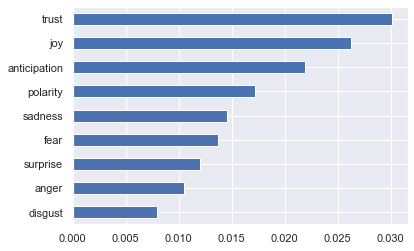

In [16]:
MANSFIELD[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

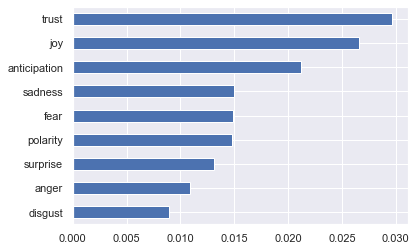

In [17]:
ABBEY[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

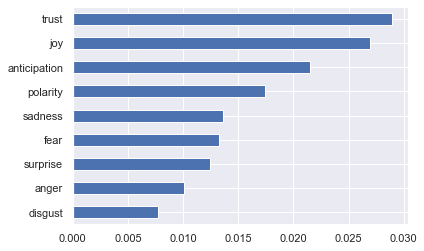

In [18]:
PRIDE[emo_cols].mean().sort_values().plot.barh()

# Sentiment by Chapter

In [19]:
MANSFIELD_chaps = MANSFIELD.groupby(CHAPS)[emo_cols].mean()
ABBEY_chaps = ABBEY.groupby(CHAPS)[emo_cols].mean()
PRIDE_chaps = PRIDE.groupby(CHAPS)[emo_cols].mean()


In [20]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

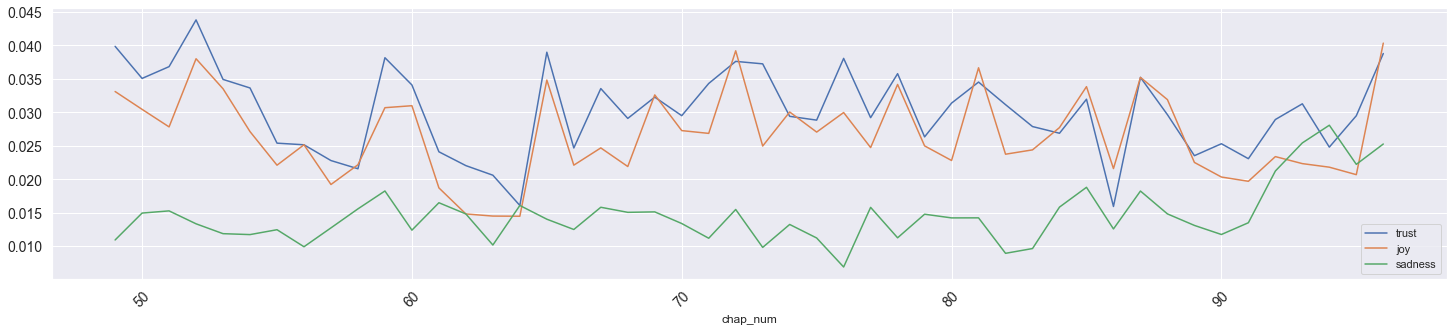

In [21]:
plot_sentiments(MANSFIELD_chaps, ['trust','joy','sadness'])

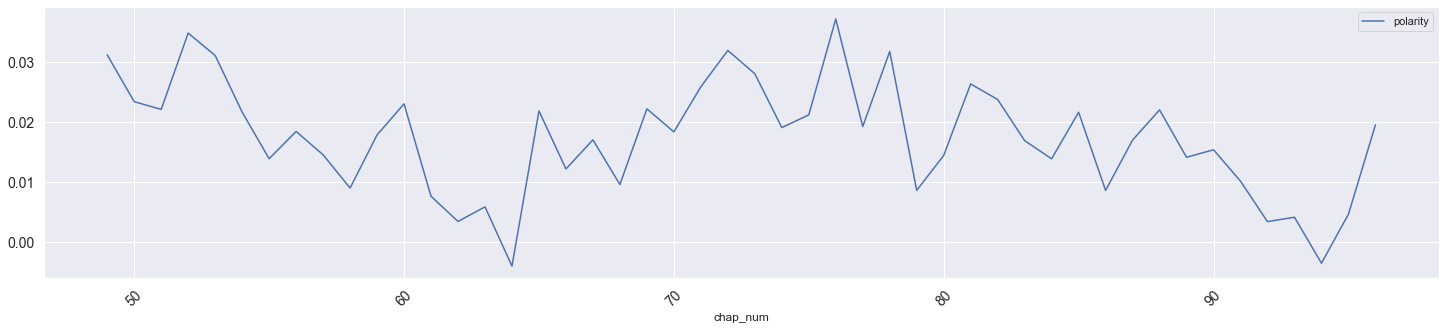

In [29]:
plot_sentiments(MANSFIELD_chaps, ['polarity'])

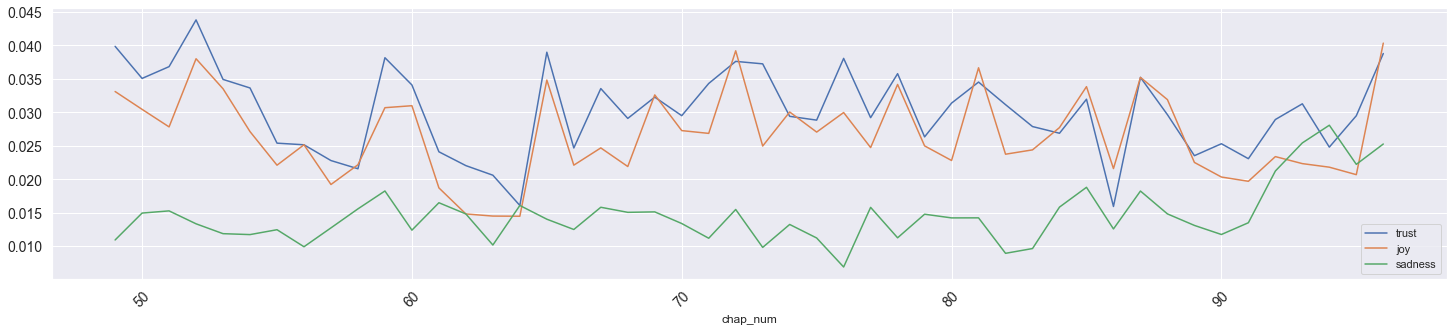

In [22]:
plot_sentiments(MANSFIELD_chaps, ['trust','joy','sadness'])

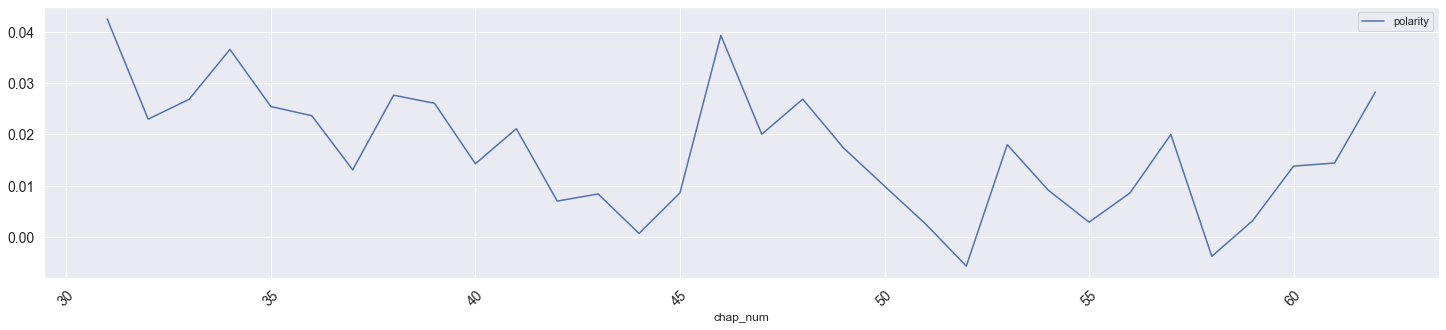

In [31]:
plot_sentiments(ABBEY_chaps, ['polarity'])

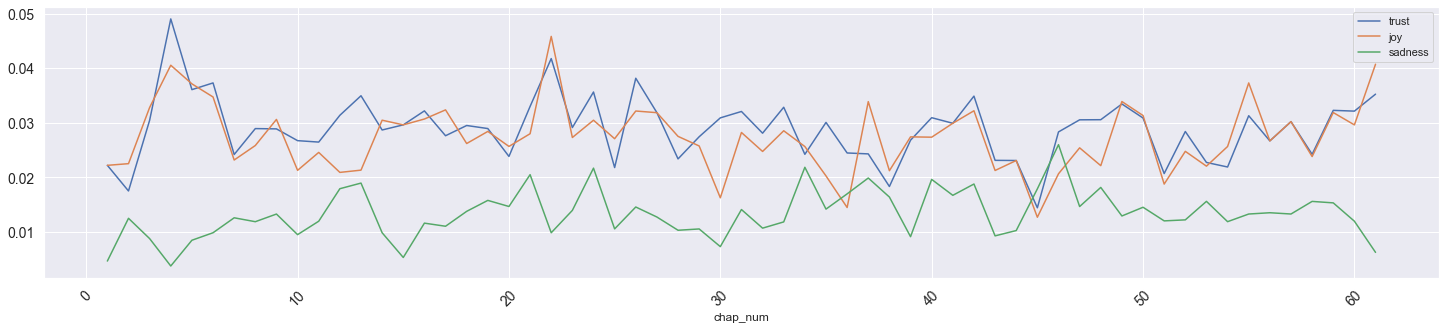

In [25]:
plot_sentiments(PRIDE_chaps, ['trust','joy','sadness'])

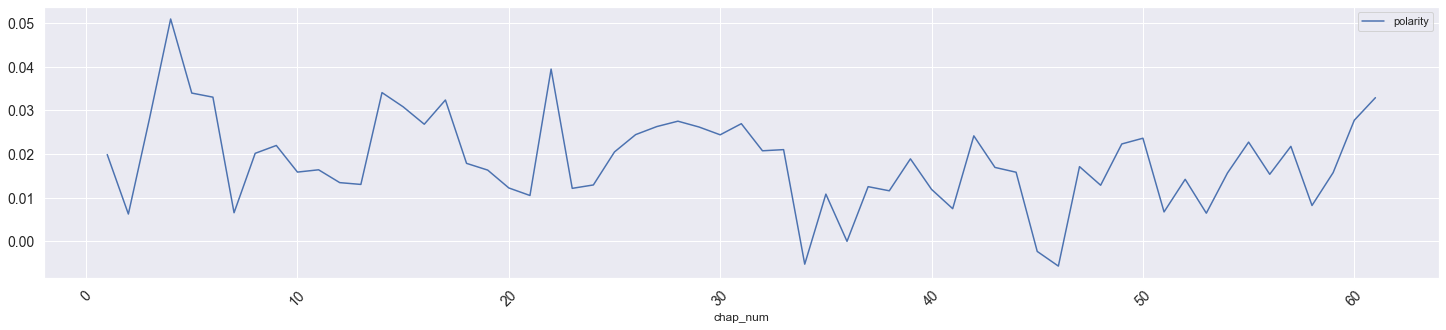

In [51]:
plot_sentiments(PRIDE_chaps, ['polarity'])

# Explore Sentiment in Texts

In [52]:
MANSFIELD['html'] =  MANSFIELD.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
ABBEY['html'] =  ABBEY.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
PRIDE['html'] =  PRIDE.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

In [33]:
MANSFIELD['html'].sample(10)

chap_num  para_num  sent_num
71        47        0           <span class='sent0'>increase</span>
87        4         9                <span class='sent0'>was</span>
66        1         3             <span class='sent0'>guided</span>
          21        4            <span class='sent1'>lesson.</span>
73        4         0                  <span class='sent0'>a</span>
55        13        2                <span class='sent0'>the</span>
83        21        1           <span class='sent0'>Crawford</span>
76        11        0                 <span class='sent0'>to</span>
74        13        0             <span class='sent0'>Edmund</span>
63        37        0           <span class='sent0'>herself.</span>
Name: html, dtype: object

In [53]:
MANSFIELD_sents = MANSFIELD.groupby(SENTS)[emo_cols].mean()
ABBEY_sents = ABBEY.groupby(SENTS)[emo_cols].mean()
PRIDE_sents = PRIDE.groupby(SENTS)[emo_cols].mean()

In [35]:
MANSFIELD_sents['sent_str'] = MANSFIELD.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
MANSFIELD_sents['html_str'] = MANSFIELD.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [36]:
ABBEY_sents['sent_str'] = ABBEY.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
ABBEY_sents['html_str'] = ABBEY.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [54]:
PRIDE_sents['sent_str'] = PRIDE.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
PRIDE_sents['html_str'] = PRIDE.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [37]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [38]:
sample_sentences(MANSFIELD_sents)

Sentiment,ID,Sentence
0.125,"(88, 9, 6)","There were none in her father’s house; but wealth is luxurious and daring, and some of hers found its way to a circulating library."
0.0909,"(94, 9, 6)",There was neither health nor gaiety in sunshine in a town.
0.0,"(54, 2, 3)","The approach _now_, is one of the finest things in the country: you see the house in the most surprising manner."
0.0,"(63, 20, 0)","“What!” cried Edmund, “if she knew your reasons!”"
0.0667,"(69, 3, 6)","No young people’s are, I suppose, when those they look up to are at home”."
0.0,"(61, 35, 2)","I shall speak to my sisters and try to dissuade _them_, and that is all I can do.”"
-0.1,"(94, 4, 1)","As no scandalous, ill-natured rumour had reached her, it was impossible for her to understand much of this strange letter."
0.0612,"(85, 13, 1)","She was of use to no one else; but _there_ she might be missed to a degree that she did not like to think of; and that part of the arrangement was, indeed, the hardest for Sir Thomas to accomplish, and what only _he_ could have accomplished at all."
0.0357,"(82, 18, 1)","If Lady Bertram, with all her incompetency and languor, could feel this, the inference of what her niece, alive and enlightened as she was, must feel, was elevating."
0.0,"(86, 43, 2)",I wish you would not be so quarrelsome.


In [39]:
sample_sentences(ABBEY_sents)

Sentiment,ID,Sentence
0.0,"(41, 14, 0)","“Yes, an acquaintance of Mrs. Hughes.”"
0.0,"(41, 1, 6)","You really have done your hair in a more heavenly style than ever; you mischievous creature, do you want to attract everybody?"
0.0,"(55, 13, 0)","“No, I was not."
0.1429,"(47, 25, 0)",“But pray tell me what you mean.”
-0.0096,"(60, 10, 3)","Why he had done it, what could have provoked him to such a breach of hospitality, and so suddenly turned all his partial regard for their daughter into actual ill will, was a matter which they were at least as far from divining as Catherine herself; but it did not oppress them by any means so long; and, after a due course of useless conjecture, that “it was a strange business, and that he must be a very strange man,” grew enough for all their indignation and wonder; though Sarah indeed still indulged in the sweets of incomprehensibility, exclaiming and conjecturing with youthful ardour."
0.0,"(53, 1, 0)","The housemaid’s folding back her window-shutters at eight o’clock the next day was the sound which first roused Catherine; and she opened her eyes, wondering that they could ever have been closed, on objects of cheerfulness; her fire was already burning, and a bright morning had succeeded the tempest of the night."
-0.1429,"(52, 12, 6)",Darkness impenetrable and immovable filled the room.
0.0294,"(39, 25, 3)","John Thorpe, in the meanwhile, had walked away; and Catherine, ever willing to give Mr. Tilney an opportunity of repeating the agreeable request which had already flattered her once, made her way to Mrs. Allen and Mrs. Thorpe as fast as she could, in the hope of finding him still with them a hope which, when it proved to be fruitless, she felt to have been highly unreasonable."
-0.0769,"(53, 39, 2)","A portrait very like of a departed wife, not valued by the husband!"
-0.0247,"(51, 1, 2)","Mr. Allen attended her to Milsom Street, where she was to breakfast, and saw her seated with the kindest welcome among her new friends; but so great was her agitation in finding herself as one of the family, and so fearful was she of not doing exactly what was right, and of not being able to preserve their good opinion, that, in the embarrassment of the first five minutes, she could almost have wished to return with him to Pulteney Street."


In [55]:
sample_sentences(PRIDE_sents)

Sentiment,ID,Sentence
0.0741,"(21, 23, 0)","""But, my dear sister, can I be happy, even supposing the best, in accepting a man whose sisters and friends are all wishing him to marry elsewhere?"""
0.0857,"(43, 51, 2)","He absolutely started, and for a moment seemed immoveable from surprise; but shortly recovering himself, advanced towards the party, and spoke to Elizabeth, if not in terms of perfect composure, at least of perfect civility."
-0.0833,"(11, 34, 1)",He began to feel the danger of paying Elizabeth too much attention.
0.0,"(13, 22, 0)","""No, my dear; I think not."
-0.0385,"(57, 4, 2)","If he is satisfied with only regretting me, when he might have obtained my affections and hand, I shall soon cease to regret him at all."""
0.0,"(60, 7, 0)","""Dearest Jane!"
0.0,"(59, 45, 4)",Mr. Darcy!
0.0,"(38, 2, 1)","The favour of your company has been much felt, I assure you."
0.0,"(33, 38, 5)","If his own vanity, however, did not mislead him, _he_ was the cause, his pride and caprice were the cause of all that Jane had suffered, and still continued to suffer."
0.0,"(1, 19, 0)","""I see no occasion for that."


# VADER

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [41]:
MANSFIELD_vader_cols = MANSFIELD_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
MANSFIELD_vader = pd.concat([MANSFIELD_sents, MANSFIELD_vader_cols], axis=1)

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

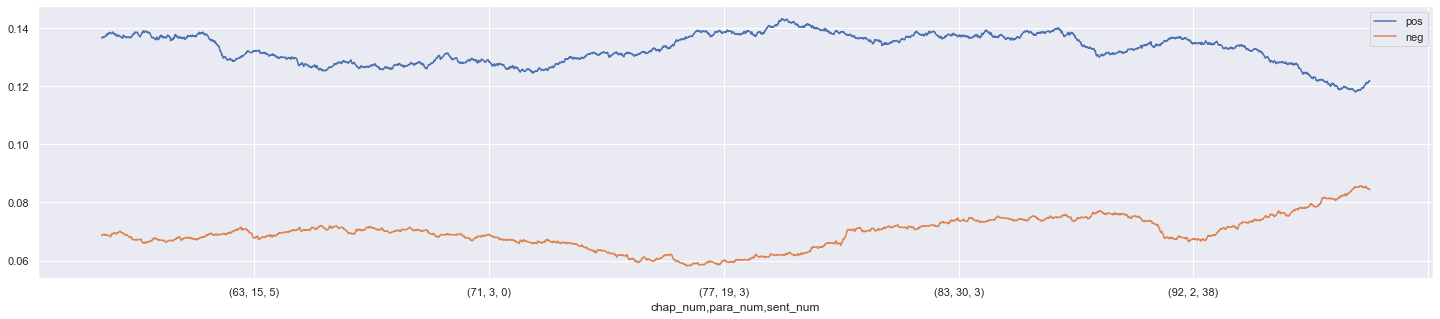

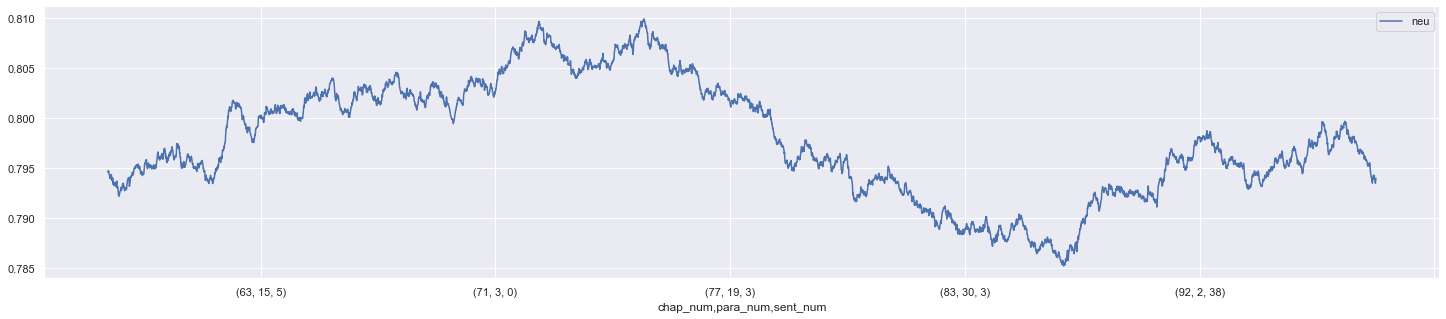

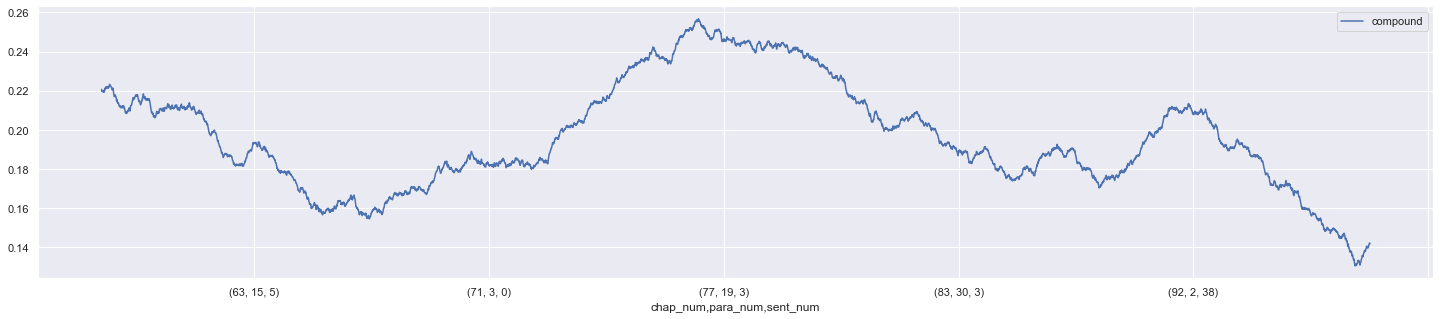

In [42]:
w = int(MANSFIELD_vader.shape[0] / 5)
MANSFIELD_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
MANSFIELD_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
MANSFIELD_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [43]:
ABBEY_vader_cols = ABBEY_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
ABBEY_vader = pd.concat([ABBEY_sents, ABBEY_vader_cols], axis=1)

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

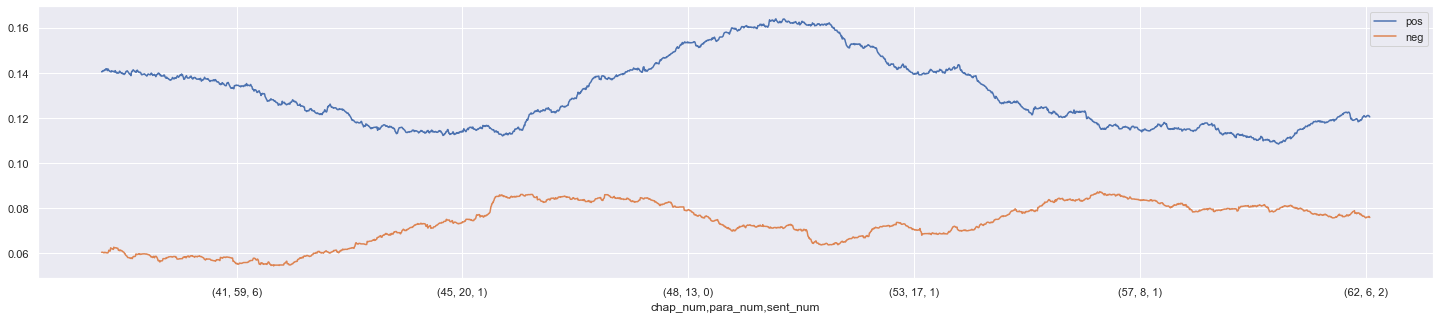

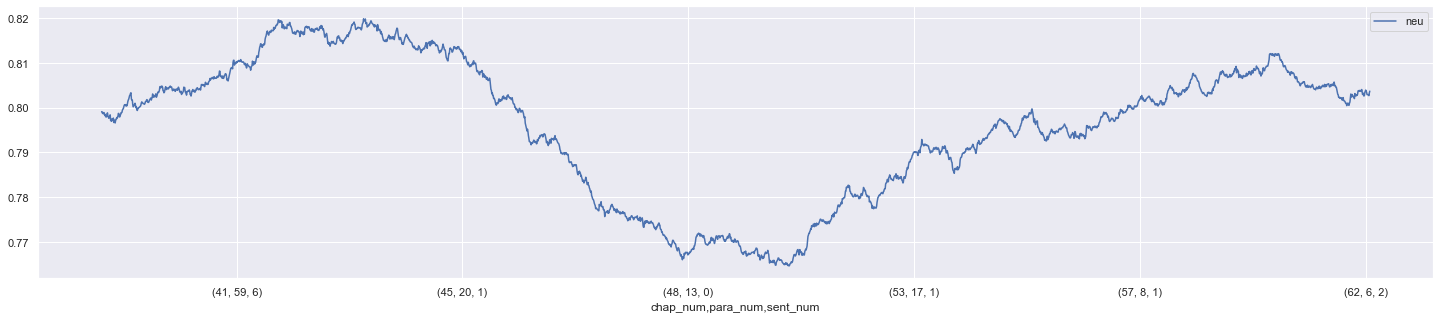

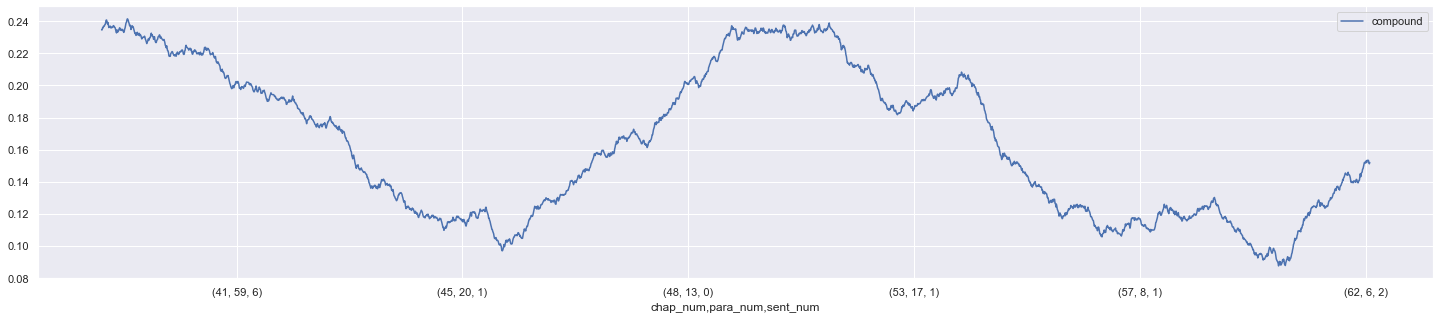

In [44]:
w = int(ABBEY_vader.shape[0] / 5)
ABBEY_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
ABBEY_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
ABBEY_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [56]:
PRIDE_vader_cols = PRIDE_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
PRIDE_vader = pd.concat([PRIDE_sents, PRIDE_vader_cols], axis=1)

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

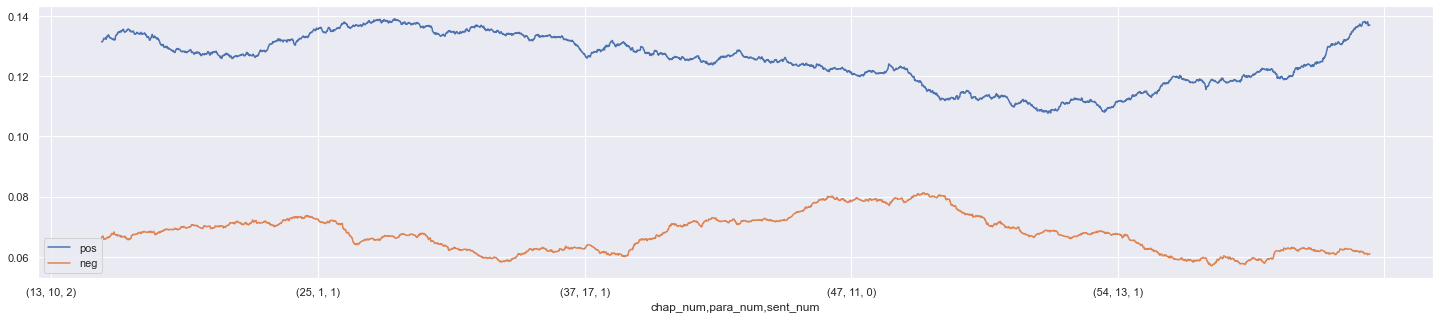

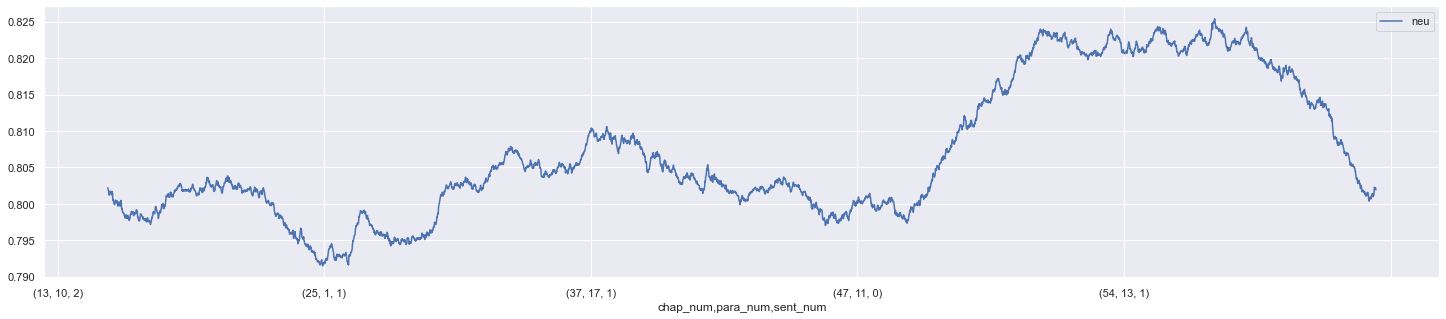

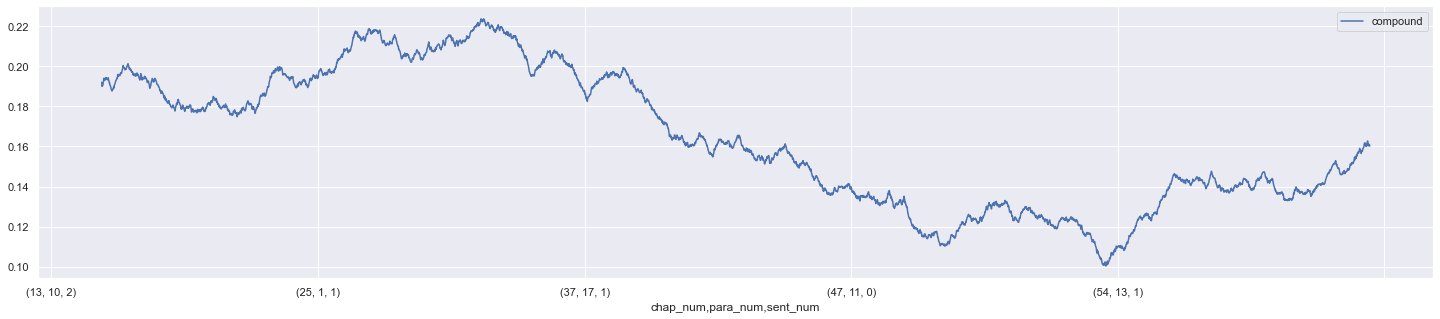

In [57]:
w = int(PRIDE_vader.shape[0] / 5)
PRIDE_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
PRIDE_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
PRIDE_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))